## Import libraries

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

!pip install umap-learn
import umap



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00


## Make some data

The data has already been simulated we will load it from github.

```python
n_samples = 1000
# Generate some data
X0, y = make_classification(n_samples=n_samples, n_features=100,
                           n_informative=10, n_redundant=80,
                           n_repeated=10, random_state=1)
X1 = []
# add in some low variance features
for i in range(0, 50):
    loc = np.random.randint(0,10)
    scale = i * 0.02
    x = np.random.normal(loc=loc, scale=scale, size=(1, 1000)).tolist()[0]
    X1.append(x)

X1 = np.array(X1).T


data = (pd.concat([pd.DataFrame(X0), pd.DataFrame(X1)], axis=1))
new_index = np.arange(0, (X0.shape[1] + X1.shape[1]) )
data.columns = new_index

data = data[np.random.choice(new_index, len(new_index))]
data.columns = new_index
data['target'] = y
data.to_csv(f'{t}.csv', index=False)
```

In [ ]:
path_to_data = "https://raw.githubusercontent.com/ArmandBester/SACAIR2024_dim_curse/refs/heads/main/candidate-2024-08-21_071931.647000.csv"
data =pd.read_csv(path_to_data)
data

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,target
0,1.607084,4.682270,2.540299,1.729016,1.729016,2.540299,-1.300672,5.896111,5.676143,1.757258,...,4.743652,-0.681672,2.556869,5.676143,8.0,3.772249,2.540299,2.556869,-0.681672,0
1,-8.102064,-2.583886,-4.267934,0.001937,0.001937,-4.267934,-3.525349,6.242218,6.115635,-2.906536,...,5.085606,-1.470726,2.582580,6.115635,8.0,4.254158,-4.267934,2.582580,-1.470726,1
2,-4.231759,-2.730118,-4.090007,-2.994795,-2.994795,-4.090007,2.637463,5.783663,7.023237,-4.900295,...,4.850947,2.075097,3.115747,7.023237,8.0,3.884678,-4.090007,3.115747,2.075097,1
3,0.338523,2.037447,-4.802257,1.588658,1.588658,-4.802257,-2.674832,6.534170,6.688421,-3.409198,...,4.854401,2.208260,2.066013,6.688421,8.0,3.850862,-4.802257,2.066013,2.208260,1
4,2.560003,-2.237003,0.315011,-0.650438,-0.650438,0.315011,3.242902,6.928813,7.852551,3.116622,...,5.104821,3.209046,2.441144,7.852551,8.0,3.812800,0.315011,2.441144,3.209046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-6.048134,4.299141,-8.042868,2.993890,2.993890,-8.042868,-7.469135,5.842113,5.455464,-5.588568,...,4.899164,1.193393,2.967759,5.455464,8.0,3.986519,-8.042868,2.967759,1.193393,1
996,-0.560387,-4.031805,2.691557,-0.174906,-0.174906,2.691557,-0.959668,5.702601,6.097483,-0.370964,...,5.071804,-4.537965,1.252036,6.097483,8.0,4.301982,2.691557,1.252036,-4.537965,0
997,7.609040,3.203054,-3.869773,0.262054,0.262054,-3.869773,6.942881,6.178166,6.290133,0.188484,...,5.156138,2.042815,4.264582,6.290133,8.0,4.173103,-3.869773,4.264582,2.042815,1
998,2.918403,5.022534,3.459261,1.737496,1.737496,3.459261,1.118135,5.668431,6.802010,1.484957,...,5.061157,-2.177413,1.758799,6.802010,8.0,3.793923,3.459261,1.758799,-2.177413,0


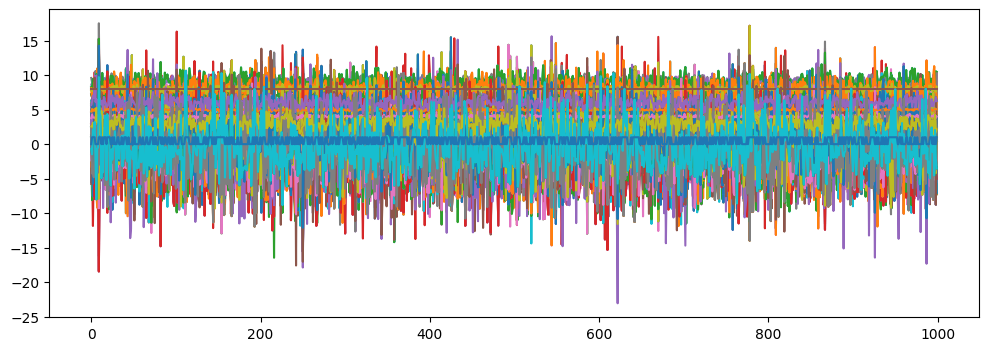

In [ ]:
data.plot(figsize=(12,4), legend=None);

In [ ]:
data.shape

(1000, 151)

## Split the data into training and testing sets

In [ ]:
X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Look at variance in the features

In [ ]:
feature_var_dict = {}
for i in range(X.shape[1]):
    feature = X_train[:,i]
    f_variance = np.var(feature)
    feature_var_dict[i] = f_variance

var_df = (pd.DataFrame.from_dict(feature_var_dict, orient='index').reset_index()
          .rename({'index': 'feature', 0: 'variance'}, axis=1)
          .sort_values("variance", ascending=False)
          .astype({"feature": str})
         )

var_df

px.bar(data_frame=var_df, x='feature', y='variance')

## Scale

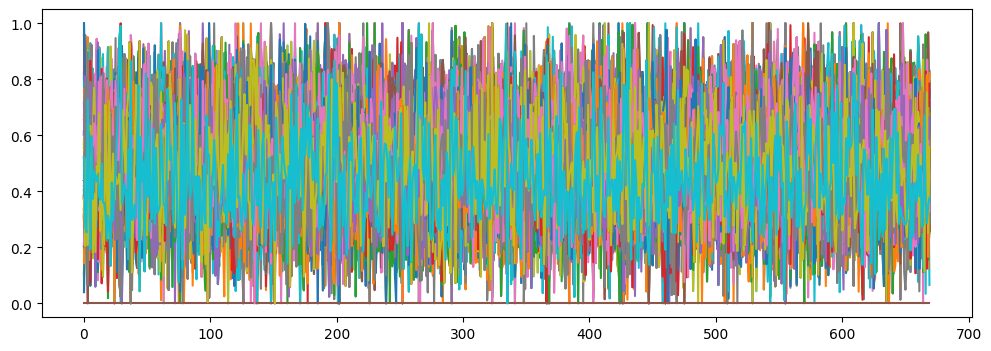

In [ ]:
min_max_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)
plt.figure(figsize=(12,4))
plt.plot(X_train_scaled);

## First model

In [ ]:
X_train_scaled.shape

(670, 150)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       154
           1       0.93      0.91      0.92       176

    accuracy                           0.92       330
   macro avg       0.91      0.92      0.91       330
weighted avg       0.92      0.92      0.92       330



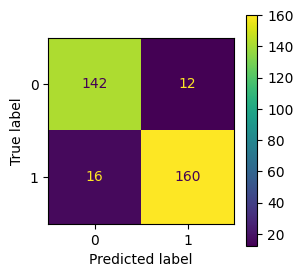

In [ ]:
model1_RF = RandomForestClassifier()
model1_RF.fit(X_train_scaled, y_train)
model1_RF_pred = model1_RF.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model1_RF_pred),
    display_labels=model1_RF.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, model1_RF_pred))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26       154
           1       0.30      0.27      0.29       176

    accuracy                           0.27       330
   macro avg       0.27      0.27      0.27       330
weighted avg       0.28      0.27      0.27       330



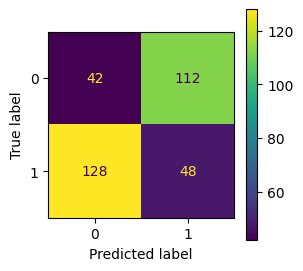

In [ ]:
model1_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
model1_KM.fit(X_train_scaled, y_train)
model1_KM_pred = model1_KM.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model1_KM_pred)
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);


print(classification_report(y_test, model1_KM_pred))

In [ ]:
print(y_train.mean(), y_test.mean()) # since we have zeros and ones for our
                                     # classes we can use the mean to look
                                     # class balance

0.48507462686567165 0.5333333333333333


## Remove columns with very low variance

In [ ]:
low_var_features = var_df.query("variance < 1")['feature'].astype(str).values.tolist()
len(low_var_features)

50

### Remove low variance features

In [ ]:
data = data.drop(low_var_features, axis=1)

X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

min_max_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(670, 100)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       154
           1       0.94      0.90      0.92       176

    accuracy                           0.92       330
   macro avg       0.91      0.92      0.91       330
weighted avg       0.92      0.92      0.92       330



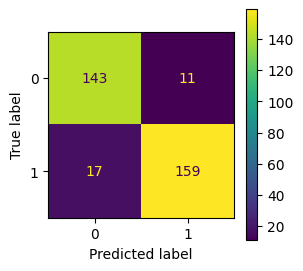

In [ ]:
model2_RF = RandomForestClassifier()
model2_RF.fit(X_train_scaled, y_train)
model2_RF_pred = model2_RF.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model2_RF_pred),
    display_labels=model2_RF.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, model2_RF_pred))

              precision    recall  f1-score   support

           0       0.26      0.30      0.28       154
           1       0.31      0.27      0.29       176

    accuracy                           0.28       330
   macro avg       0.29      0.29      0.28       330
weighted avg       0.29      0.28      0.29       330



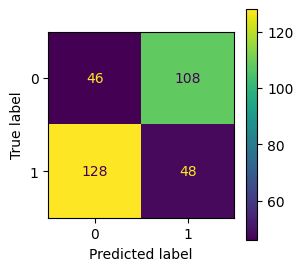

In [ ]:
model2_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
model2_KM.fit(X_train_scaled, y_train)
model2_KM_pred = model2_KM.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model2_KM_pred)
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);


print(classification_report(y_test, model2_KM_pred))

## Get highly correlated features

* reduce redundancy

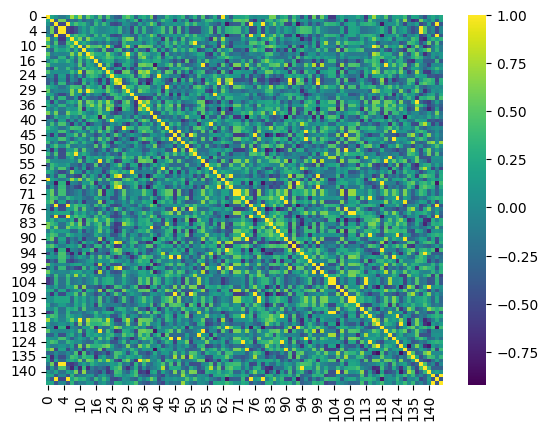

In [ ]:
corrMat = data.drop('target', axis=1).corr()
sns.heatmap(corrMat, cmap='viridis');

In [ ]:
corrMat

In [ ]:
discard = (abs(corrMat)                  # we take the abs of the correlation matrix
           .stack()
           .reset_index()
           .rename({'level_0': 'A',
                   'level_1': 'B',
                    0: 'corr'},
                   axis=1)

            .query("A != B")
            .query("corr >=  0.85")        # this correlation cutoff can vary depending on what we know about our data
            .drop(['B', 'corr'], axis=1)
            .drop_duplicates()
            ['A']
            .values
          )
discard

array(['0', '2', '3', '4', '5', '9', '10', '14', '18', '24', '26', '27',
       '28', '29', '30', '33', '38', '39', '40', '42', '43', '44', '45',
       '46', '50', '51', '52', '53', '56', '58', '61', '62', '65', '66',
       '70', '71', '73', '74', '75', '76', '78', '81', '84', '88', '90',
       '91', '93', '94', '96', '98', '99', '100', '103', '104', '105',
       '107', '109', '110', '113', '114', '115', '116', '118', '119',
       '120', '122', '124', '131', '133', '136', '137', '138', '140',
       '142', '147', '149'], dtype=object)

In [ ]:
len(discard)

76

In [ ]:
data = data.drop(discard, axis=1)
X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

min_max_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)
X_train_scaled.shape

(670, 24)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       154
           1       0.93      0.91      0.92       176

    accuracy                           0.92       330
   macro avg       0.91      0.92      0.91       330
weighted avg       0.92      0.92      0.92       330



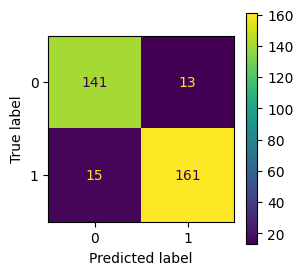

In [ ]:
model3_RF = RandomForestClassifier()
model3_RF.fit(X_train_scaled, y_train)
model3_RF_pred = model3_RF.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model3_RF_pred),
    display_labels=model3_RF.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, model3_RF_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       154
           1       0.59      0.59      0.59       176

    accuracy                           0.56       330
   macro avg       0.56      0.56      0.56       330
weighted avg       0.56      0.56      0.56       330



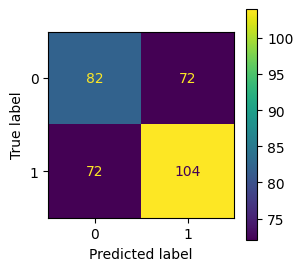

In [ ]:
model3_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
model3_KM.fit(X_train_scaled, y_train)
model3_KM_pred = model3_KM.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model3_KM_pred),
    #display_labels=model1_KM.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);


print(classification_report(y_test, model3_KM_pred))

## What if we don't discard correlated feature but combine them?

In [ ]:
(corrMat                  # we take the abs of the correlation matrix
   .stack()
   .reset_index()
   .rename({'level_0': 'A',
            'level_1': 'B',
            0: 'corr'},
           axis=1)

    .query("A != B")
    .query("corr >=  0.85")        # this correlation cutoff can vary depending on what we know about our data
     ['corr']
    .mean()
 )

```
Even though in our case it won't make sense (since the variables are so highly correlated),
but one can also combine variables: multiplying them together, summing deviding ... meam.
Even better if you have some domain knowledge on the data, some of these methods of combining
would make more sense. As an excample, say you had a dataset for predicting house prises and you have width
and length, then multiplying these would give you the area. Now it makes sense to keep area
and remove width and length
```

## How can we find feature importance?

Let's import our data from scratch again and see what we can find

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       154
           1       0.93      0.90      0.91       176

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



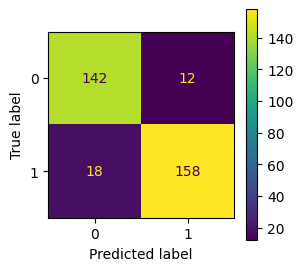

In [ ]:
data = pd.read_csv(path_to_data)
X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, rfc_pred)
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);


print(classification_report(y_test, rfc_pred))

In [ ]:
importance = rfc.feature_importances_
names = data.drop("target", axis=1).columns
feature_importance_df = pd.DataFrame.from_dict({"feature": names,
                                               "importance": importance}
                                              ).sort_values("importance", ascending=False) # we sort the columns by feature importance
feature_importance_df

,feature,importance
99,99,0.039692
149,149,0.033702
142,142,0.031034
78,78,0.029876
91,91,0.029480
...,...,...
141,141,0.001185
144,144,0.001032
32,32,0.000981
67,67,0.000695


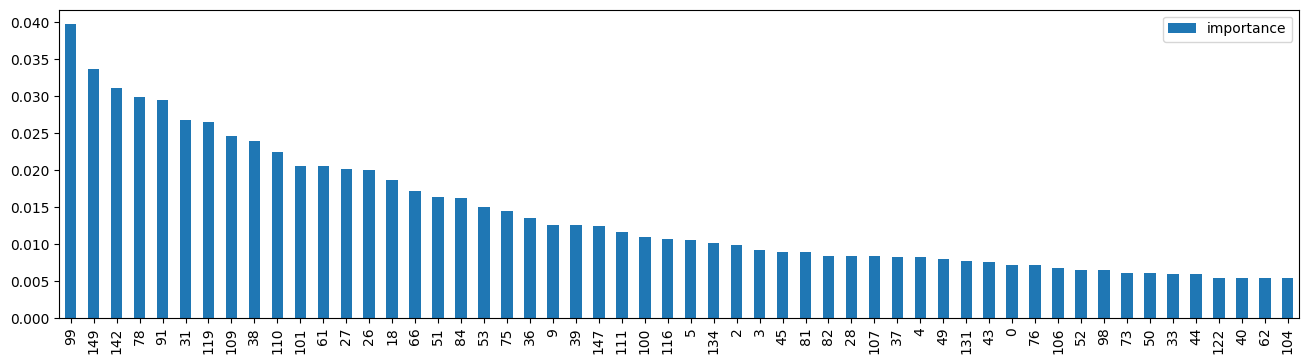

In [ ]:
feature_importance_df.query("importance >= 0.005").plot(kind='bar', figsize=(16,4));

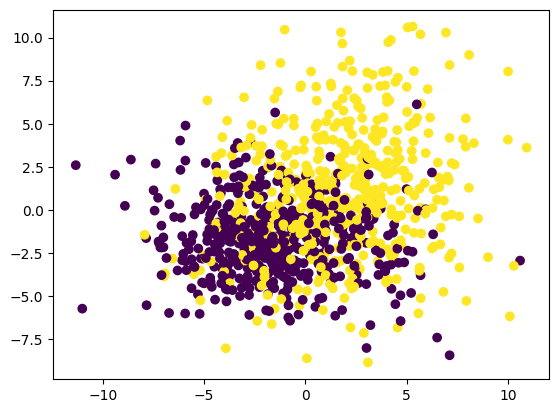

In [ ]:
plt.scatter(data=data, x='99', y='149', c='target');

In [ ]:
fig = px.scatter_3d(data_frame=data, x='99', y='149', z='142', opacity=0.7,
                    color='target', height=800, width=1000)
fig.update_traces(marker_size = 5)
fig.show()

## Test feature importance on models

In [ ]:
def  transform_data(dataframe=data, top_n_features=2):

    selection = feature_importance_df.iloc[0:top_n_features,0].values
    print("Features in order:", selection, "\n")
    X = data[selection].values
    y = data['target'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    min_max_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = min_max_scaler.transform(X_train)
    X_test_scaled = min_max_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

Features in order: ['99' '149' '142' '78' '91' '31' '119' '109' '38' '110' '101'] 

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       154
           1       0.85      0.82      0.83       176

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.83      0.82      0.82       330



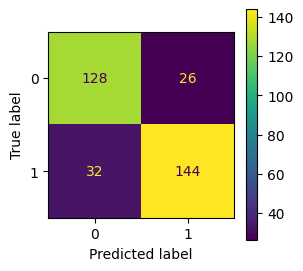

In [ ]:
# Slecect the number of features
X_train_scaled, X_test_scaled, y_train, y_test = transform_data(data, 11)

model4_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
model4_KM.fit(X_train_scaled, y_train)
model4_KM_pred = model4_KM.predict(X_test_scaled)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, model4_KM_pred),
    #display_labels=model1_KM.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, model4_KM_pred))

### Write a for loop to look at number of top features and model performance

In [ ]:
%%capture
f1_vs_n_features = {}
for n_features in range(1,150):
  X_train_scaled, X_test_scaled, y_train, y_test = transform_data(data, n_features)

  model4_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
  model4_KM.fit(X_train_scaled, y_train)
  model4_KM_pred = model4_KM.predict(X_test_scaled)

  f1 = f1_score(y_test, model4_KM_pred, average='weighted', zero_division='warn')
  f1_vs_n_features[n_features] = f1

f1Df  = pd.DataFrame.from_dict(f1_vs_n_features, orient='index').reset_index().rename({'index': 'n_features', 0: 'f1'}, axis=1)

In [ ]:

px.line(data_frame=f1Df, x='n_features', y='f1')

# Dimentionality reduction and latent space

## Principle component analysis

In [ ]:
data = pd.read_csv(path_to_data)

X = data.drop("target", axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

min_max_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [ ]:
keep_fisrt_n = 10
pca = PCA(n_components=keep_fisrt_n)
pComponents = pca.fit_transform(X_train_scaled)
pComponents.shape

(670, 10)

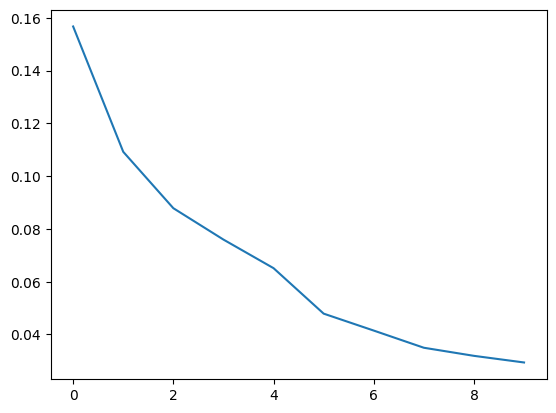

In [ ]:

plt.plot(pca.explained_variance_ratio_)

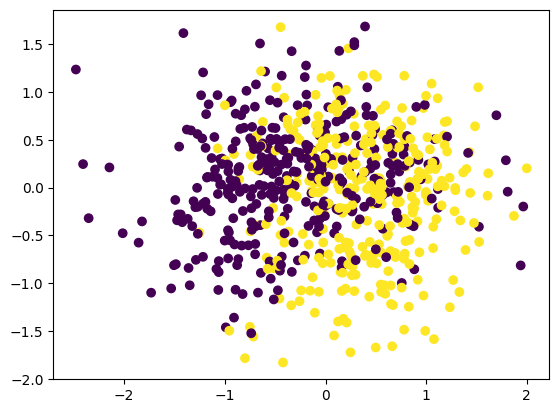

In [ ]:
pcaDf = pd.DataFrame(pComponents)
pcaDf['target'] = y_train
plt.scatter(pcaDf[0], pcaDf[1], c=pcaDf['target'])

In [ ]:
fig = px.scatter_3d(data_frame=pcaDf, x=0, y=1, z=2, color='target', height=800, width=1000)
fig.update_traces(marker_size=3)
fig

In [ ]:
pComponents.shape

(670, 10)

In [ ]:
pComponents_test = pca.transform(X_test_scaled)
pComponents_test.shape

(330, 10)

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       154
           1       0.76      0.72      0.74       176

    accuracy                           0.73       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.73      0.73      0.73       330



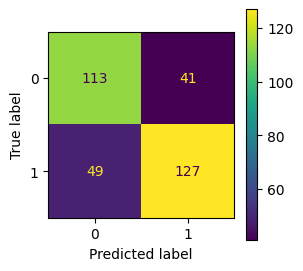

In [ ]:
PCA_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
PCA_KM.fit(pComponents, y_train)
PCA_KM_pred = PCA_KM.predict(pComponents_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, PCA_KM_pred),
    #display_labels=model1_KM.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, PCA_KM_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       154
           1       0.90      0.84      0.87       176

    accuracy                           0.86       330
   macro avg       0.86      0.87      0.86       330
weighted avg       0.87      0.86      0.86       330



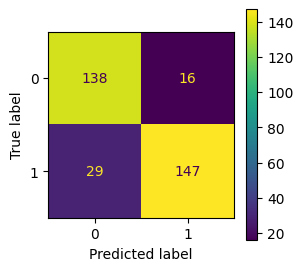

In [ ]:
PCA_RFC = RandomForestClassifier()
PCA_RFC.fit(pComponents, y_train)
PCA_RFC_pred = PCA_RFC.predict(pComponents_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, PCA_RFC_pred),
    #display_labels=model1_KM.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, PCA_RFC_pred))

## Uniform Manifold Approximation and Projection

In [ ]:
reducer = umap.UMAP(n_neighbors=7, n_components=3, random_state=42, n_jobs=1)
reducer = reducer.fit(X_train_scaled)
embedding_train = reducer.transform(X_train_scaled)
embedding_test = reducer.transform(X_test_scaled)
embedding_train.shape, embedding_test.shape

((670, 3), (330, 3))

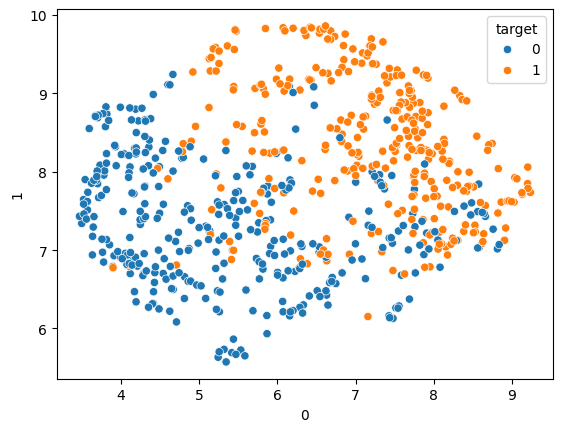

In [ ]:
umap_plot_df = pd.DataFrame(embedding_train)
umap_plot_df['target'] = y_train
sns.scatterplot(data=umap_plot_df, x=0, y=1, hue='target');

In [ ]:
fig = px.scatter_3d(data_frame=umap_plot_df, x=0, y=1, z=2,
                    color='target', height=800, width=1000)
fig.update_traces(marker_size=3)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       154
           1       0.85      0.81      0.83       176

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



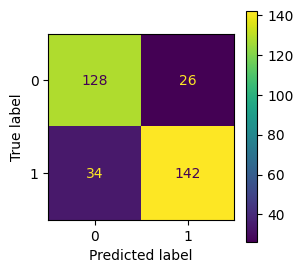

In [ ]:
UMAP_KM = KMeans(n_clusters=2, random_state=0, n_init="auto")
UMAP_KM.fit(embedding_train, y_train)
UMAP_KM_pred = UMAP_KM.predict(embedding_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, UMAP_KM_pred),
    #display_labels=model1_KM.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, UMAP_KM_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       154
           1       0.91      0.84      0.88       176

    accuracy                           0.87       330
   macro avg       0.87      0.88      0.87       330
weighted avg       0.88      0.87      0.87       330



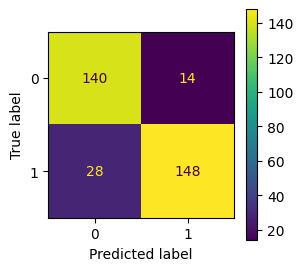

In [ ]:
UMAP_RFC = RandomForestClassifier()
UMAP_RFC.fit(embedding_train, y_train)
UMAP_RFC_pred = UMAP_RFC.predict(embedding_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, UMAP_RFC_pred),
    #display_labels=model1_KM.classes_
)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax);

print(classification_report(y_test, UMAP_RFC_pred))